In [20]:
from topic_specificity import calculate_specificity_for_all_topics
import pickle
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt

In [31]:
 # 1. Load model and corpus
dataset = '20ng'
dictionary = pickle.load(open(f'Results/LDA/{dataset}_dictionary.dict','rb'))
corpus = pickle.load(open(f'Results/LDA/{dataset}_corpus.pkl','rb'))
lda = LdaModel.load(f"Results/LDA/{dataset}_lda50.model")


In [33]:
specificity_scores = calculate_specificity_for_all_topics(
    model=lda,
    corpus=corpus,
    mode='lda',
    threshold_mode='gmm',         # options: 'median', 'percentile', 'gmm'
    specificity_mode='sqrt'       # options: 'diff', 'sqrt'
)

print("Specificity scores:", specificity_scores)

Specificity scores: [0.18896437853615394, 0.15154007198284994, 0.35219751270792055, 0.14392748721881826, 0.2979555144144068, 0.15657555954259164, 0.19120671367923084, 0.17786980730926075, 0.1481735563507959, 0.149197365613474, 0.1534276576528444, 0.15303316249026652, 0.17598777251858758, 0.17097614088489047, 0.16030835762390105, 0.22297463884814211, 0.21191358477253258, 0.21245991326154115, 0.23440169615008616, 0.2319013555442155, 0.2605872185340838, 0.17812824244324918, 0.1551072933531194, 0.37558615347434676, 0.12119199373137277, 0.13846177876212074, 0.11302100099123229, 0.3410090315805309, 0.15927763903772474, 0.20455958610097355, 0.22698731348243148, 0.11257901412306888, 0.13272183512742183, 0.22750720975772795, 0.15679461420405, 0.17411411660981263, 0.2638947104963239, 0.15136212133995236, 0.15090400977943033, 0.15123829755109325, 0.20248404769338038, 0.17521469327828723, 0.1732688424213801, 0.17929223066626374, 0.13739863629453336, 0.13791619849671122, 0.146223633161958, 0.176812

In [34]:
mappings = pickle.load(open(f'Results/{dataset}_repllama_lda_mapping.pkl','rb'))

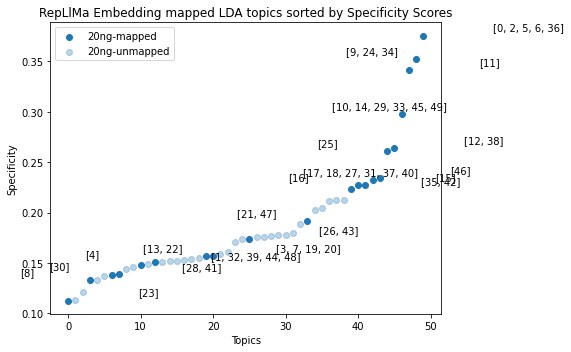

In [35]:
annotated = True
# Extract set of topics that have at least one mapped feature
mapped_topics = {topic_id for _, topic_id in mappings}

# Extract each mapped list
mapped_features = {topic_id:[feature_id for feature_id, topic in mappings if topic == topic_id] for topic_id in mapped_topics}

# Pair topic IDs with their specificity scores
topic_scores = list(enumerate(specificity_scores))

# Sort by specificity score (low to high)
sorted_topic_scores = sorted(topic_scores, key=lambda x: x[1])
sorted_topics, sorted_scores = zip(*sorted_topic_scores)

# X positions for plotting
x_positions = list(range(len(sorted_topics)))

# Split into mapped vs. unmapped
mapped_x = [x for x, t in zip(x_positions, sorted_topics) if t in mapped_topics]
mapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t in mapped_topics]

unmapped_x = [x for x, t in zip(x_positions, sorted_topics) if t not in mapped_topics]
unmapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t not in mapped_topics]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mapped_x, mapped_y, color='C0', alpha=1.0, label=f'{dataset}-mapped')
plt.scatter(unmapped_x, unmapped_y, color='C0', alpha=0.3, label=f'{dataset}-unmapped')
if annotated:
    # Annotate mapped features
    sorted_m_t = [t for x, t in zip(x_positions, sorted_topics) if t in mapped_topics]
    for i in range(len(sorted_m_t)):
        plt.annotate(
        str(mapped_features[sorted_m_t[i]]),              # text you want to display
        (mapped_x[i], mapped_y[i]),           # the data point coordinates
        textcoords='offset points',  # interpret xytext offset in points
        xytext=(70*(-1)**i, 5),      # shift text 5 points right and up
        ha='left'           # left-align text relative to the point
    )

plt.xlabel('Topics')
plt.ylabel('Specificity')
plt.legend()
plt.title('RepLlMa Embedding mapped LDA topics sorted by Specificity Scores')
plt.tight_layout()
plt.savefig(f'Results/{dataset}_repllama.pdf')
plt.show()


## Figure with all three collections

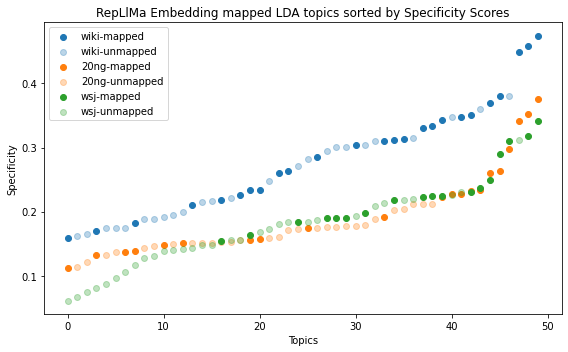

In [14]:
# Create scatter plot
plt.figure(figsize=(8, 5))
colors = ['C0','C1','C2']
i = 0
#plot for each collection
for collection in ['wiki','20ng','wsj']:
    dataset = collection
    dictionary = pickle.load(open(f'Results/LDA/{dataset}_dictionary.dict','rb'))
    corpus = pickle.load(open(f'Results/LDA/{dataset}_corpus.pkl','rb'))
    lda = LdaModel.load(f"Results/LDA/{dataset}_lda50.model")
    
    specificity_scores = calculate_specificity_for_all_topics(
        model=lda,
        corpus=corpus,
        mode='lda',
        threshold_mode='gmm',         # options: 'median', 'percentile', 'gmm'
        specificity_mode='sqrt'       # options: 'diff', 'sqrt'
    )
    
    mappings = pickle.load(open(f'Results/{dataset}_repllama_lda_mapping.pkl','rb'))
    
    # Extract set of topics that have at least one mapped feature
    mapped_topics = {topic_id for _, topic_id in mappings}

    # Extract each mapped list
    mapped_features = {topic_id:[feature_id for feature_id, topic in mappings if topic == topic_id] for topic_id in mapped_topics}

    # Pair topic IDs with their specificity scores
    topic_scores = list(enumerate(specificity_scores))

    # Sort by specificity score (low to high)
    sorted_topic_scores = sorted(topic_scores, key=lambda x: x[1])
    sorted_topics, sorted_scores = zip(*sorted_topic_scores)

    # X positions for plotting
    x_positions = list(range(len(sorted_topics)))

    # Split into mapped vs. unmapped
    mapped_x = [x for x, t in zip(x_positions, sorted_topics) if t in mapped_topics]
    mapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t in mapped_topics]

    unmapped_x = [x for x, t in zip(x_positions, sorted_topics) if t not in mapped_topics]
    unmapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t not in mapped_topics]
    
    plt.scatter(mapped_x, mapped_y, color=colors[i], alpha=1.0, label=f'{dataset}-mapped')
    plt.scatter(unmapped_x, unmapped_y, color=colors[i], alpha=0.3, label=f'{dataset}-unmapped')
    i+=1
    
plt.xlabel('Topics')
plt.ylabel('Specificity')
plt.legend()
plt.title('RepLlMa Embedding mapped LDA topics sorted by Specificity Scores')
plt.tight_layout()
plt.savefig(f'Results/lda_repllama.pdf')
plt.show()